/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


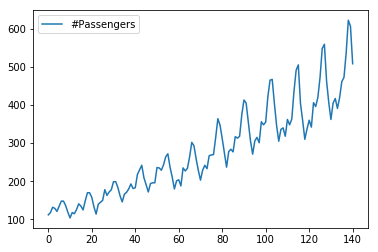

In [1]:
import pandas as pd
import tensorflow as tf
%matplotlib inline
df = pd.read_csv('AirPassengers.csv', engine='python', skipfooter=3)
df.plot()

In [2]:
import numpy as np
import pandas as pd
import tflearn
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv('AirPassengers.csv',
        usecols=[1],
        engine='python',
        skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
dataset -= np.min(np.abs(dataset))
dataset /= np.max(np.abs(dataset))

In [5]:
def create_dataset(dataset, steps_of_history, steps_in_future):
    X, Y = [], []
    for i in range(0, len(dataset)-steps_of_history, steps_in_future):
        X.append(dataset[i:i+steps_of_history])
        Y.append(dataset[i + steps_of_history])
    X = np.reshape(np.array(X), [-1, steps_of_history, 1])
    Y = np.reshape(np.array(Y), [-1, 1])
    return X, Y

def split_data(x, y, test_size=0.1):
    pos = round(len(x) * (1 - test_size))
    trainX, trainY = x[:pos], y[:pos]
    testX, testY   = x[pos:], y[pos:]
    return trainX, trainY, testX, testY

steps_of_history = 3
steps_in_future = 1

X, Y = create_dataset(dataset, steps_of_history, steps_in_future)
X_gru, Y_gru = create_dataset(dataset, steps_of_history, steps_in_future)
trainX, trainY, testX, testY = split_data(X, Y, 0.33)
trainX_gru, trainY_gru, testX_gru, testY_gru = split_data(X_gru, Y_gru, 0.33)

In [6]:
net = tflearn.input_data(shape=[None, steps_of_history, 1])
net = tflearn.lstm(net, n_units=6)
net = tflearn.fully_connected(net, 1, activation='linear')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(trainX, trainY, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 12299  | total loss: 0.00165 | time: 0.204s
| Adam | epoch: 150 | loss: 0.00165 -- iter: 81/82
Training Step: 12300  | total loss: 0.00189 | time: 1.212s
| Adam | epoch: 150 | loss: 0.00189 | val_loss: 0.00047 -- iter: 82/82
--


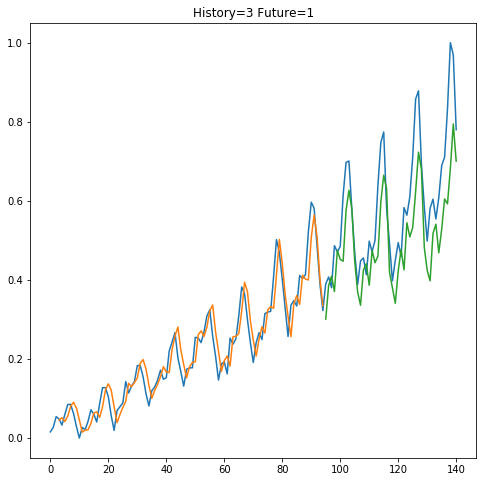

In [7]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('passenger.png')

In [8]:
tf.reset_default_graph()
net_gru = tflearn.input_data(shape=[None, steps_of_history, 1])
net_gru = tflearn.gru(net_gru, n_units=6)
net_gru = tflearn.fully_connected(net_gru, 1, activation='linear')
net_gru = tflearn.regression(net_gru, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model_gru = tflearn.DNN(net_gru, tensorboard_verbose=0)
model_gru.fit(trainX_gru, trainY_gru, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 12299  | total loss: 0.00213 | time: 0.205s
| Adam | epoch: 150 | loss: 0.00213 -- iter: 81/82
Training Step: 12300  | total loss: 0.00217 | time: 1.216s
| Adam | epoch: 150 | loss: 0.00217 | val_loss: 0.00113 -- iter: 82/82
--


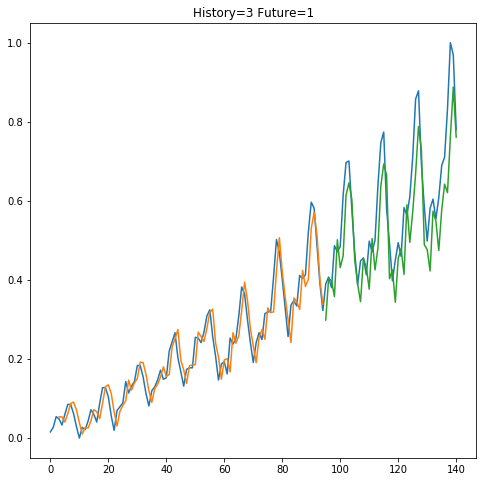

In [9]:
train_predict = model_gru.predict(trainX)
test_predict = model_gru.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('passenger.png')

In [12]:
tf.reset_default_graph()
net_gru = tflearn.input_data(shape=[None, steps_of_history, 1])
net_gru = tflearn.gru(net_gru, n_units=6, return_seq=True)
net_gru = tflearn.gru(net_gru, n_units=6)
net_gru = tflearn.fully_connected(net_gru, 1, activation='linear')
net_gru = tflearn.regression(net_gru, optimizer='adam', learning_rate=0.001,
        loss='mean_square')

model_gru = tflearn.DNN(net_gru, tensorboard_verbose=0)
model_gru.fit(trainX_gru, trainY_gru, validation_set=0.1, batch_size=1, n_epoch=150)

Training Step: 12299  | total loss: 0.00248 | time: 0.409s
| Adam | epoch: 150 | loss: 0.00248 -- iter: 81/82
Training Step: 12300  | total loss: 0.00226 | time: 1.415s
| Adam | epoch: 150 | loss: 0.00226 | val_loss: 0.00152 -- iter: 82/82
--


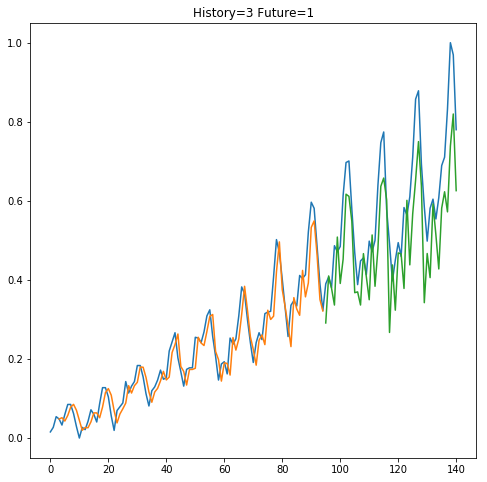

In [13]:
train_predict = model_gru.predict(trainX)
test_predict = model_gru.predict(testX)

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[steps_of_history:len(train_predict)+steps_of_history, :] = \
        train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+steps_of_history:len(dataset), :] = \
        test_predict

plt.figure(figsize=(8, 8))
plt.title('History={} Future={}'.format(steps_of_history, steps_in_future))
plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.savefig('passenger.png')